In [1]:
# A brief about problem statement

In [2]:
'''
LearnX Sales Forecasting
LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on

Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.

Sales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on

Competition in the market for each course
Course Type (Course/Program/Degree)
Holiday Information for each day
User Traffic on Course Page for each day
Your task is to predict the course sales for each course in the test set for the next 60 days
'''

"\nLearnX Sales Forecasting\nLearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on\n\nEffective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.\n\nSales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on\n\nCompetition in the market for each course\nCourse Type (Course/Program/Degree)\nHoliday Information for each day\nUser Traffic on Course Page for each day\nYour task is to predict the course sales for each course in the test set for the n

In [3]:
# Importing required libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import accuracy_score

In [5]:
# rmsle=np.sqrt(mean_squared_log_error(y_true,y_pred))

In [6]:
# Loading dataset

In [90]:
train=pd.read_csv("C://Users//acer//Desktop//1sem//python//do//LearnX//train.csv")
test=pd.read_csv("C://Users//acer//Desktop//1sem//python//do//LearnX//test.csv")

In [8]:
# Lets have a glance at the train and test dataset

In [91]:
train.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [92]:
test.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [11]:
# shape of train and test dataset

In [12]:
print(train.shape)
print(test.shape)

(512087, 11)
(36000, 9)


In [13]:
# Listing all columns

In [14]:
print(train.columns)
print(test.columns)

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')
Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric'],
      dtype='object')


In [15]:
# A brief description of train dataset

In [16]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
ID,0,0.000000,int64,512087
Day_No,0,0.000000,int64,882
Course_ID,0,0.000000,int64,600
Course_Domain,0,0.000000,object,4
Course_Type,0,0.000000,object,3
Short_Promotion,0,0.000000,int64,2
Public_Holiday,0,0.000000,int64,2
Long_Promotion,0,0.000000,int64,2
User_Traffic,0,0.000000,int64,3475
Competition_Metric,1764,0.003445,float64,196


In [17]:
# Exploratory Data Analysis

In [18]:
# Lets see the distribution of categorical variables

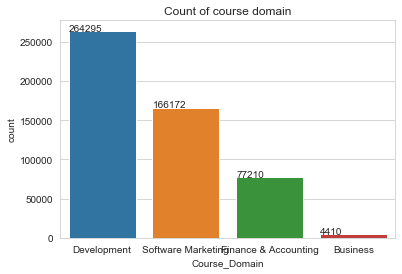

In [19]:
fig=sns.countplot("Course_Domain",data=train)
plt.title("Count of course domain")
for count in fig.patches:
    fig.annotate(count.get_height(),(count.get_x(),count.get_height()))
plt.savefig("Learn-course.png")

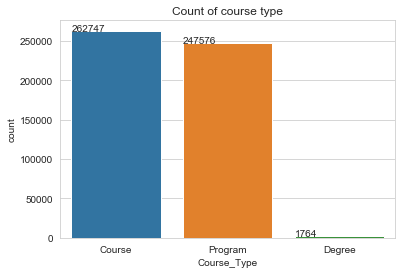

In [20]:
fig=sns.countplot("Course_Type",data=train)
plt.title("Count of course type")
for count in fig.patches:
    fig.annotate(count.get_height(),(count.get_x(),count.get_height()))
plt.savefig("Learn-course type.png")

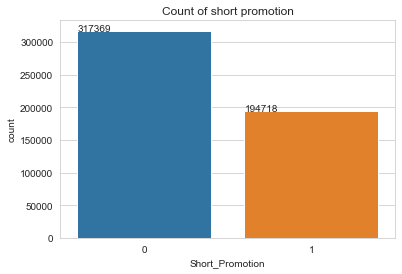

In [21]:
fig=sns.countplot("Short_Promotion",data=train)
plt.title("Count of short promotion")
for count in fig.patches:
    fig.annotate(count.get_height(),(count.get_x(),count.get_height()))
plt.savefig("Learn-short promotion.png")

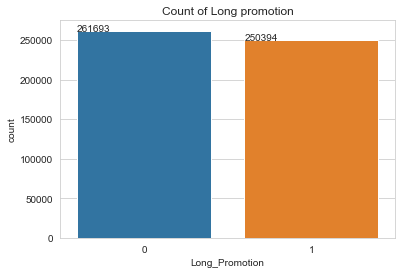

In [22]:
fig=sns.countplot("Long_Promotion",data=train)
plt.title("Count of Long promotion")
for count in fig.patches:
    fig.annotate(count.get_height(),(count.get_x(),count.get_height()))
plt.savefig("Learn-Long promotion.png")

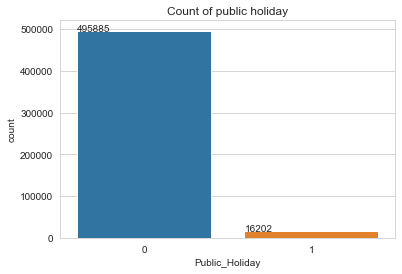

In [23]:
fig=sns.countplot("Public_Holiday",data=train)
plt.title("Count of public holiday")
for count in fig.patches:
    fig.annotate(count.get_height(),(count.get_x(),count.get_height()))
plt.savefig("Learn-Public holiday.png")

In [24]:
# Lets see basic stats of target column

In [25]:
train.Sales.describe()

count    512087.000000
mean        120.826924
std          54.355258
min           0.000000
25%          84.000000
50%         111.000000
75%         146.000000
max         682.000000
Name: Sales, dtype: float64

In [26]:
# Lets plot target variable

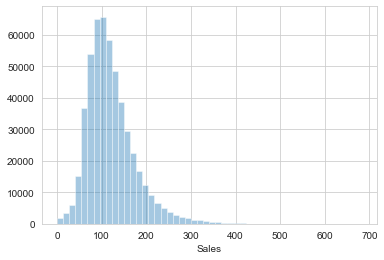

In [27]:
sns.distplot(train['Sales'],kde=False,bins=50)
plt.savefig("Learn-Sales.png")

In [28]:
# Bivariate analysis

In [29]:
# Lets explore each  course by its ID

In [30]:
train.groupby('Course_ID')['Sales'].agg(['min','max','mean','median','std'])

,min,max,mean,median,std
Course_ID,,,,,
1,4,193,85.251701,82.0,29.447275
2,12,284,120.595238,114.0,39.861145
3,17,333,153.207483,147.0,44.441534
4,5,207,94.812925,91.0,34.177977
5,12,230,113.215420,109.0,29.666804
...,...,...,...,...,...
596,9,190,84.924036,84.0,25.372054
597,4,226,91.241497,87.0,30.037841
598,18,456,180.100907,167.0,60.508815


In [31]:
# Lets see course domain

In [32]:
train.groupby('Course_Domain')['Sales'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')

,count,min,max,mean,median,std,sum
Course_Domain,,,,,,,
Business,4410,42,569,186.592971,180,61.808322,822875
Finance & Accounting,77210,1,569,124.520231,114,54.017313,9614207
Software Marketing,166172,2,682,118.654665,112,46.175358,19717083
Development,264295,0,640,120.016391,108,58.206817,31719732


In [33]:
# Lets plot this for better understanding

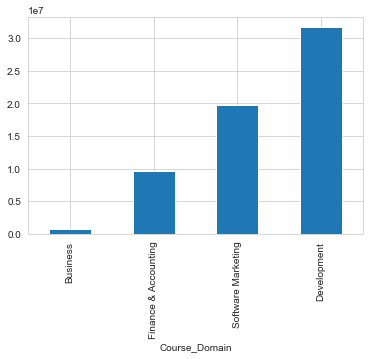

In [34]:
train.groupby('Course_Domain')['Sales'].sum().sort_values().plot(kind='bar')

In [35]:
# Lets see course type

In [36]:
train.groupby("Course_Type")["Sales"].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')

,count,min,max,mean,median,std,sum
Course_Type,,,,,,,
Degree,1764,91,329,184.061224,181,35.060659,324684
Program,247576,0,682,128.246482,117,56.821830,31750751
Course,262747,0,599,113.411236,104,50.734514,29798462


In [37]:
# Lets visualize 

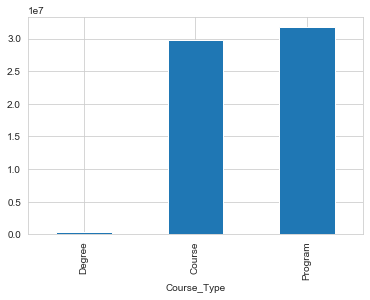

In [38]:
train.groupby('Course_Type')['Sales'].sum().sort_values().plot(kind='bar')

In [39]:
# Lets impute mean values where we have null values

In [40]:
# train.Competition_Metric.fillna(train.Competition_Metric.mean(),inplace=True)

In [41]:
# As we dont have User_Traffic in test dataset we can follow 2 approaches
# Predict this column
# drop from train dataset
# Here i am predicting user traffic

In [ ]:
# Lets encode that 2 categorical variables

In [93]:
train_new=pd.get_dummies(train[["Course_Domain","Course_Type"]])

In [ ]:
# concating with our dataframe

In [94]:
train_new1=pd.concat([train,train_new],axis=1)

In [ ]:
# dropping the original categorical variables

In [95]:
train_new1.drop(["Course_Domain","Course_Type"],axis=1,inplace=True)

In [96]:
train_new1.columns

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [ ]:
# as we have null values under one col we impute mean values

In [97]:
train_new1.Competition_Metric.fillna(train_new1.Competition_Metric.mean(),inplace=True)

In [ ]:
# Lets drop sales column as we are now predicting user traffic

In [98]:
train_new2=train_new1.drop("Sales",axis=1)

In [ ]:
# Lets divide dataset into dependent and independent dataset

In [99]:
y=train_new2["User_Traffic"]
x=train_new2.drop(["ID","User_Traffic"],axis=1)

In [ ]:
# Lets split our dataset into train and test 

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# shaoe of splitted dataset

In [101]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (358460, 13)
shape of y_train is: (358460,)
shape of x_test is: (153627, 13)
shape of y_test is: (153627,)


In [ ]:
# applying ml model to predict 

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [105]:
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [ ]:
# Lets see the actual vs predicted values

In [106]:
pd.DataFrame({"Actual":y_test,"Predicted":prediction})

,Actual,Predicted
306474,11907,11957.4
256834,13314,10789.8
121832,12180,11081.7
444789,25074,23520.0
279276,6279,6001.8
...,...,...
71147,23247,22755.6
341357,7434,5607.0
193903,21378,17220.0
300666,13230,12627.3


In [ ]:
# Lets check the accuracy

In [107]:
rmsle=np.sqrt(mean_squared_log_error(y_test,prediction))
print(rmsle*1000)

227.52165653711432


In [ ]:
# Lets apply another model so that we can compare which model values to keep

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [109]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*1000)

269.73471410964305


In [110]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred=br.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*1000)

228.8051184374894


In [30]:
rr=Ridge(alpha=0.10)
rr.fit(x_train,y_train)
pred=rr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*1000)

402.29854977999145


In [31]:
lar=Lasso()
lar.fit(x_train,y_train)
pred=lar.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*1000)

402.2917966291


In [ ]:
# lets use random forest for future prediction

In [ ]:
# Now lets process test dataset

In [111]:
test.head(1)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007


In [ ]:
# Lets encode 2 categorical variables

In [112]:
test_new=pd.get_dummies(test[["Course_Domain","Course_Type"]])

In [ ]:
# concating with original datafrme

In [113]:
test_new1=pd.concat([test,test_new],axis=1)

In [ ]:
# Lets drop the original categorical variables

In [114]:
test_new2=test_new1.drop(["ID","Course_Domain","Course_Type"],axis=1)

In [ ]:
# Lets impute mean values in place of null values

In [115]:
test_new2.Competition_Metric.fillna(test_new2.Competition_Metric.mean(),inplace=True)

In [116]:
test_new2.isna().any()

Day_No                                False
Course_ID                             False
Short_Promotion                       False
Public_Holiday                        False
Long_Promotion                        False
Competition_Metric                    False
Course_Domain_Business                False
Course_Domain_Development             False
Course_Domain_Finance & Accounting    False
Course_Domain_Software Marketing      False
Course_Type_Course                    False
Course_Type_Degree                    False
Course_Type_Program                   False
dtype: bool

In [ ]:
# Lets predict user traffic

In [117]:
rf.fit(x,y)
pred=rf.predict(test_new2)

In [ ]:
# converting results in dataframe

In [118]:
pred_df=pd.DataFrame({"User_Traffic":pred})

In [ ]:
# concating with original test dataset

In [119]:
test_new3=pd.concat([test_new2,pred_df],axis=1)

In [120]:
test_new3.head(1)

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program,User_Traffic
0,883,1,1,0,1,0.007,0,1,0,0,1,0,0,16060.8


In [ ]:
# Lets see the train dataset

In [121]:
train_new1.head(1)

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program
0,1,1,1,0,1,1,11004,0.007,81,0,1,0,0,1,0,0


In [ ]:
# Dropping id col

In [122]:
train_new1.drop(["ID"],axis=1,inplace=True)

In [ ]:
# Lets see full dataset 

In [123]:
full_dataset=pd.concat([train_new1,test_new3],axis=0,sort=False)

In [124]:
full_dataset.head(1)

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program
0,1,1,0,1,1,11004.0,0.007,81.0,0,1,0,0,1,0,0


In [125]:
train_new1.shape

(512087, 15)

In [126]:
test_new3.shape

(36000, 14)

In [ ]:
# dividing dataset into train and test 

In [127]:
final_train=full_dataset.iloc[:512087]

In [128]:
final_test=full_dataset.iloc[512087:]

In [ ]:
# splitting train dataset into dependent and independent dataset

In [131]:
y=final_train["Sales"]
x=final_train.drop(["Sales"],axis=1)

In [ ]:
# splitting dataset in train test 

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Lets see the splitted dataset

In [135]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (358460, 14)
shape of y_train is: (358460,)
shape of x_test is: (153627, 14)
shape of y_test is: (153627,)


In [ ]:
# Lets apply ml model

In [136]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [137]:
prediction=np.round(prediction)
prediction=prediction.astype(int)

In [ ]:
# Comapring predicted values with actual values

In [138]:
pd.DataFrame({"Actual":y_test,"Predicted":prediction})

,Actual,Predicted
306474,76.0,71
256834,115.0,104
121832,129.0,127
444789,222.0,222
279276,48.0,56
...,...,...
71147,176.0,174
341357,55.0,52
193903,222.0,215
300666,172.0,165


In [109]:
# Lets see the accuracy 

In [139]:
rmsle=np.sqrt(mean_squared_log_error(y_test,prediction))
print(rmsle*1000)

77.31181545205911


In [ ]:
# Lets apply another model

In [140]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
pred=np.round(pred)
pred=pred.astype(int)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*1000)

97.62378811819539


In [142]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred=br.predict(x_test)
pred=np.round(pred)
pred=pred.astype(int)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*1000)

77.32415704379083


In [ ]:
# Lets apply rf on test dataset

In [145]:
final_test.drop(["Sales"],axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [147]:
rf=RandomForestRegressor()
rf.fit(x,y)
prediction=rf.predict(final_test)
prediction=np.round(prediction)
prediction=prediction.astype(int)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Lets convert this prediction into dataframe

In [150]:
submission=pd.DataFrame({"Sales":prediction})

In [ ]:
# Lets prepare our dataframe as asked for submission

In [154]:
final_df=pd.read_csv("C://Users//acer//Desktop//1sem//python//do//LearnX//test.csv",usecols=["ID"])

In [ ]:
# concat prediction of sales against ID

In [160]:
final_submission=pd.concat([final_df,submission],axis=1)

In [ ]:
# Converting result in csv

In [162]:
final_submission.to_csv("LearnX1.csv", index=False)

In [ ]:
# Thank you